**1. IMPORTATION DE COLAB**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PREDICTION_DE_PERFORMANCES.xlsx to PREDICTION_DE_PERFORMANCES.xlsx


In [ ]:
print (uploaded['PREDICTION_DE_PERFORMANCES.xlsx'])  

b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x9e,lon\x01\x00\x00\x10\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
#!pip install datetime

**2. Importation de certaines librairies à utilser**


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
df = pd.read_excel(uploaded['PREDICTION_DE_PERFORMANCES.xlsx'])
df

,Genre,Age,Repos,EtatCivil,Orphelin,Disparu,Profession,Confession,Origine,Deumeure,TypeEcole,Option,CompMath,Compétent_Langues,Compétent_Physique,Compétent_Chimie,Compétent_Biologie,Compétent_Informatique,Compétent_Philosophie,Compétent_Dissertation,Compétent_Agronomie,Compétent_Psychologie,Compétent_Pédagogie,Compétent_Comptabilité,Compétent_Electricité,Compétent_Électronique,Compétent_Mécanique,Compétent_Législation,Compétent_Automobile,Compétent_Demographie,Compétent_Béton_Armé,Compétent_Résistance_des_matériaux,Compétent_Hygiène_et_Sécurité_Sociale,Vouloir_devenir,Distance,Autre_Institution,Département,Qui_Orienté_au_département,RévisezNotes,Nbreabsences,EXETAT,ConcoursAdmission,Actuel_niveau,FièretéDpt,Pourcentage1erG1,Pourcentage2ndG1,PourcentageG1,Pourcentage1erG2,Pourcentage2ndG2,PourcentageG2,Pourcentage1erG3,Pourcentage2ndG3,PourcentageG3
0,Féminin,21,0,Célibataire,Non,NaN,Aucune,Catholique,Nord-Kivu,Maman,Catholique,Secrétariat,Non,Moyen,NaN,NaN,NaN,Oui,NaN,NaN,NaN,NaN,NaN,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestionnaire,1 à 2,NON,Informatique de Gestion,Seul(e),Souvent,2,56,53.0,G2,Oui,64,62.0,63.0,53.0,NaN,NaN,NaN,NaN,NaN
1,Féminin,22,1,Célibataire,Oui,De la mère,Aucune,Catholique,Nord-Kivu,Papa,Catholique,Nutrition,Oui,Oui,Oui,Oui,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestionnaire,3 à 4,NON,Développement,Seul(e),Souvent,0,61,NaN,G3,Oui,64,65.0,64.5,65.0,60.0,62.5,64.0,NaN,NaN
2,Masculin,23,0,Célibataire,Non,NaN,Aucune,Catholique,Nord-Kivu,Seul(e),Étatique,Secrétariat,Oui,Oui,Oui,NaN,Moyen,Oui,Oui,NaN,NaN,NaN,NaN,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingénieur,Plus de 6,NON,Informatique de Gestion,Seul(e),Souvent,1,71,NaN,G2,Oui,65,60.0,62.5,59.0,NaN,NaN,NaN,NaN,NaN
3,Féminin,20,0,Marié (e),Non,NaN,Ménagère,Catholique,Nord-Kivu,Conjoint(e),Catholique,Latin Philo,Moyen,Oui,Oui,Oui,Moyen,Oui,Moyen,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingénieure informaticienne,1 à 2,NON,Informatique de Gestion,Seul(e),Souvent,0,62,NaN,Déjà Gradué,Oui,68,64.0,66.0,66.0,67.0,66.5,68.0,69.0,68.5
4,Masculin,19,1,Célibataire,Non,NaN,Journaliste,Catholique,Ituri,Amis,Catholique,Latin Philo,Oui,Oui,Oui,Non,Oui,Non,Oui,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Journaliste,1 à 2,NON,Sciences de l'Information de de la Communication,Amis,Souvent,1,57,68.0,Déjà Gradué,Oui,60,62.0,61.0,62.0,65.0,63.5,63.0,67.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Féminin,20,1,Célibataire,Non,NaN,Aucune,Catholique,Nord-Kivu,Deux parents,Catholique,Biochimie,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ingénieur,3 à 4,NON,Informatique de Gestion,Seul(e),Souvent,1,59,75.0,Déjà Gradué,Oui,70,72.0,71.0,74.0,68.0,71.0,71.0,72.0,71.5
1034,Féminin,19,1,Célibataire,Non,NaN,Entrepreneur,Catholique,Nord-Kivu,Confrères (Consoeurs),Anglicane,Math-Physique,Oui,Oui,Oui,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,"Gestionnaire, Comptable",Plus de 6,NON,Philosophie,Seul(e),Souvent,0,64,NaN,Déjà Gradué,Oui,54,50.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN
1035,Féminin,23,3,Célibataire,Non,NaN,Aucune,Catholique,Haut-Uele,Seul(e),Catholique,Pédagogie,Non,Oui,Oui,Oui,Oui,NaN,Oui,Oui,NaN,Oui,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ingénieur, Comptable",0 à 1,NON,Informatique de Gestion,Seul(e),Souvent,0,53,60.0,Déjà Gradué,Oui,59,60.0,59.5,58.0,58.0,58.0,59.0,59.0,59.0
1036,Féminin,20,2,Célibataire,Oui,Du père,Aucune,Catholique,Nord-Kivu,Oncle,Catholique,Pédagogie,Oui,Oui,Oui,Oui,Oui,Non,Oui,Oui,Non,Oui,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Gestionnaire,0 à 1,NON,Sciences de l'Information de de la Communication,Seul(e),Rarement,0,53,60.0,Déjà Gradué,Non,57,60.0,58.5,58.0,61.0,59.5,60.0,59.0,59.5


In [ ]:
donnee=df.shape
donnee

(1038, 53)

 **3. EXPLORATOIRE ET PRE TRAITEMENT GENERAL DE NOTRE DATASET**

In [ ]:
df.dtypes.value_counts()

object     39
float64     9
int64       5
dtype: int64

In [ ]:
df=df.drop(['Actuel_niveau'],axis=1)
df=df.drop(['FièretéDpt'],axis=1)

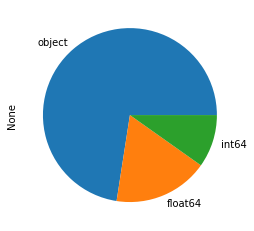

In [ ]:
df.dtypes.value_counts().plot.pie()

**3.1. Recherche de Champs vide **

Ici, nous présentons les champs vides en pourcentage selon nos variables 
afin de trier afin de supprimer les colonnes vides de
 moins plus de 70% de vide dans la partie qui suit

In [ ]:
df.isna()

,Genre,Age,Repos,EtatCivil,Orphelin,Disparu,Profession,Confession,Origine,Deumeure,TypeEcole,Option,CompMath,Compétent_Langues,Compétent_Physique,Compétent_Chimie,Compétent_Biologie,Compétent_Informatique,Compétent_Philosophie,Compétent_Dissertation,Compétent_Agronomie,Compétent_Psychologie,Compétent_Pédagogie,Compétent_Comptabilité,Compétent_Electricité,Compétent_Électronique,Compétent_Mécanique,Compétent_Législation,Compétent_Automobile,Compétent_Demographie,Compétent_Béton_Armé,Compétent_Résistance_des_matériaux,Compétent_Hygiène_et_Sécurité_Sociale,Vouloir_devenir,Distance,Autre_Institution,Département,Qui_Orienté_au_département,RévisezNotes,Nbreabsences,EXETAT,ConcoursAdmission,Pourcentage1erG1,Pourcentage2ndG1,PourcentageG1,Pourcentage1erG2,Pourcentage2ndG2,PourcentageG2,Pourcentage1erG3,Pourcentage2ndG3,PourcentageG3
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1034,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True
1035,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1036,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Genre                                    0.000000
Autre_Institution                        0.000000
Département                              0.000000
Qui_Orienté_au_département               0.000000
RévisezNotes                             0.000000
Nbreabsences                             0.000000
EXETAT                                   0.000000
Pourcentage1erG1                         0.000000
Pourcentage2ndG1                         0.000000
PourcentageG1                            0.000000
Distance                                 0.000000
Compétent_Langues                        0.000000
Vouloir_devenir                          0.000000
Option                                   0.000000
TypeEcole                                0.000000
Age                                      0.000000
Repos                                    0.000000
Deumeure                                 0.000000
Origine                                  0.000000
Confession                               0.000000


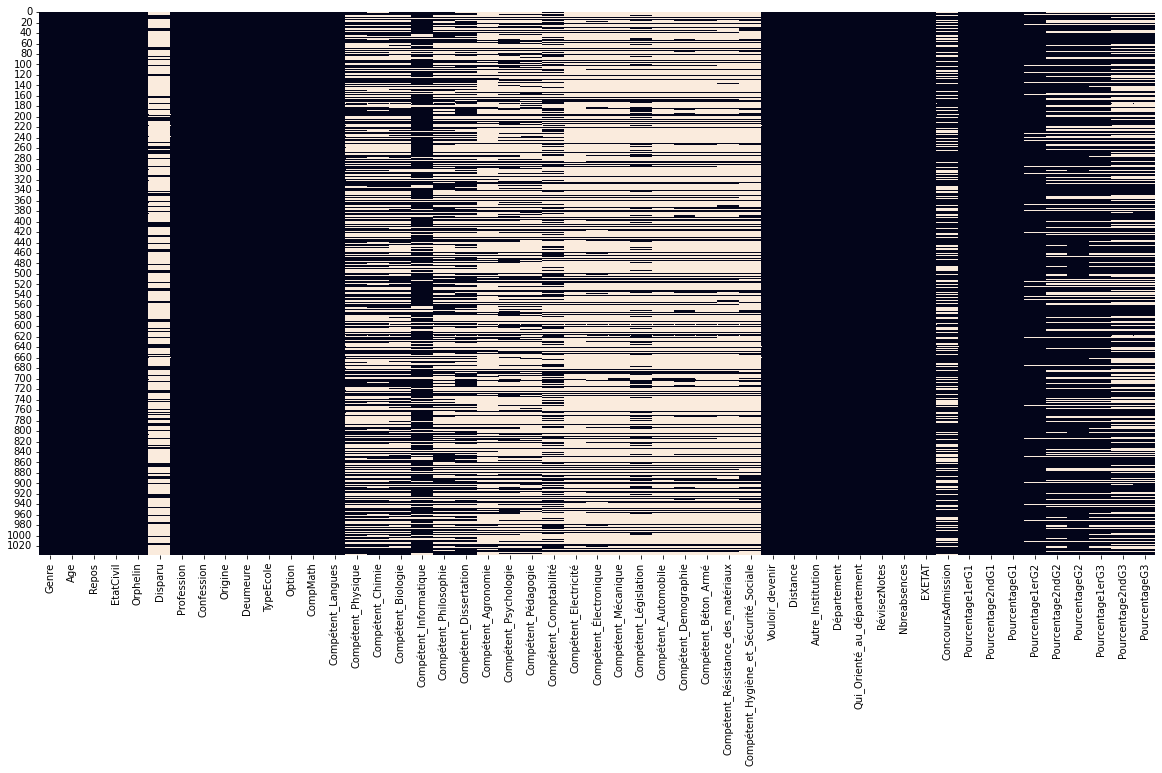

In [ ]:
#Nous matloper 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False) 

In [ ]:
df=df[df.columns[df.isna().sum()/df.shape[0] <0.5]]
df

,Genre,Age,Repos,EtatCivil,Orphelin,Profession,Confession,Origine,Deumeure,TypeEcole,Option,CompMath,Compétent_Langues,Compétent_Physique,Compétent_Chimie,Compétent_Biologie,Compétent_Informatique,Compétent_Dissertation,Vouloir_devenir,Distance,Autre_Institution,Département,Qui_Orienté_au_département,RévisezNotes,Nbreabsences,EXETAT,ConcoursAdmission,Pourcentage1erG1,Pourcentage2ndG1,PourcentageG1,Pourcentage1erG2,Pourcentage2ndG2,PourcentageG2,Pourcentage1erG3,Pourcentage2ndG3,PourcentageG3
0,Féminin,21,0,Célibataire,Non,Aucune,Catholique,Nord-Kivu,Maman,Catholique,Secrétariat,Non,Moyen,NaN,NaN,NaN,Oui,NaN,Gestionnaire,1 à 2,NON,Informatique de Gestion,Seul(e),Souvent,2,56,53.0,64,62.0,63.0,53.0,NaN,NaN,NaN,NaN,NaN
1,Féminin,22,1,Célibataire,Oui,Aucune,Catholique,Nord-Kivu,Papa,Catholique,Nutrition,Oui,Oui,Oui,Oui,Oui,NaN,NaN,Gestionnaire,3 à 4,NON,Développement,Seul(e),Souvent,0,61,NaN,64,65.0,64.5,65.0,60.0,62.5,64.0,NaN,NaN
2,Masculin,23,0,Célibataire,Non,Aucune,Catholique,Nord-Kivu,Seul(e),Étatique,Secrétariat,Oui,Oui,Oui,NaN,Moyen,Oui,NaN,Ingénieur,Plus de 6,NON,Informatique de Gestion,Seul(e),Souvent,1,71,NaN,65,60.0,62.5,59.0,NaN,NaN,NaN,NaN,NaN
3,Féminin,20,0,Marié (e),Non,Ménagère,Catholique,Nord-Kivu,Conjoint(e),Catholique,Latin Philo,Moyen,Oui,Oui,Oui,Moyen,Oui,Oui,Ingénieure informaticienne,1 à 2,NON,Informatique de Gestion,Seul(e),Souvent,0,62,NaN,68,64.0,66.0,66.0,67.0,66.5,68.0,69.0,68.5
4,Masculin,19,1,Célibataire,Non,Journaliste,Catholique,Ituri,Amis,Catholique,Latin Philo,Oui,Oui,Oui,Non,Oui,Non,Oui,Journaliste,1 à 2,NON,Sciences de l'Information de de la Communication,Amis,Souvent,1,57,68.0,60,62.0,61.0,62.0,65.0,63.5,63.0,67.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Féminin,20,1,Célibataire,Non,Aucune,Catholique,Nord-Kivu,Deux parents,Catholique,Biochimie,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Ingénieur,3 à 4,NON,Informatique de Gestion,Seul(e),Souvent,1,59,75.0,70,72.0,71.0,74.0,68.0,71.0,71.0,72.0,71.5
1034,Féminin,19,1,Célibataire,Non,Entrepreneur,Catholique,Nord-Kivu,Confrères (Consoeurs),Anglicane,Math-Physique,Oui,Oui,Oui,Oui,Oui,Oui,Oui,"Gestionnaire, Comptable",Plus de 6,NON,Philosophie,Seul(e),Souvent,0,64,NaN,54,50.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN
1035,Féminin,23,3,Célibataire,Non,Aucune,Catholique,Haut-Uele,Seul(e),Catholique,Pédagogie,Non,Oui,Oui,Oui,Oui,NaN,Oui,"Ingénieur, Comptable",0 à 1,NON,Informatique de Gestion,Seul(e),Souvent,0,53,60.0,59,60.0,59.5,58.0,58.0,58.0,59.0,59.0,59.0
1036,Féminin,20,2,Célibataire,Oui,Aucune,Catholique,Nord-Kivu,Oncle,Catholique,Pédagogie,Oui,Oui,Oui,Oui,Oui,Non,Oui,Gestionnaire,0 à 1,NON,Sciences de l'Information de de la Communication,Seul(e),Rarement,0,53,60.0,57,60.0,58.5,58.0,61.0,59.5,60.0,59.0,59.5


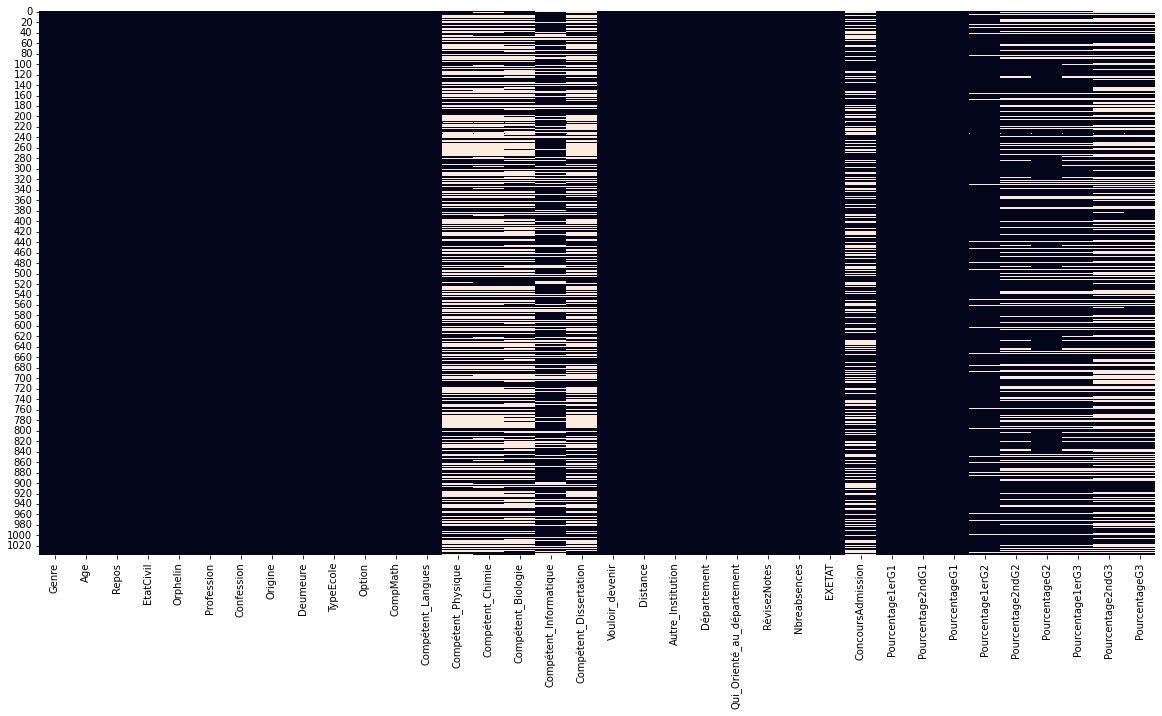

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [ ]:
donnee=df.shape
donnee

(1038, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Genre                       1038 non-null   object 
 1   Age                         1038 non-null   int64  
 2   Repos                       1038 non-null   int64  
 3   EtatCivil                   1038 non-null   object 
 4   Orphelin                    1038 non-null   object 
 5   Profession                  1038 non-null   object 
 6   Confession                  1038 non-null   object 
 7   Origine                     1038 non-null   object 
 8   Deumeure                    1038 non-null   object 
 9   TypeEcole                   1038 non-null   object 
 10  Option                      1038 non-null   object 
 11  CompMath                    1038 non-null   object 
 12  Compétent_Langues           1038 non-null   object 
 13  Compétent_Physique          540 n

In [ ]:
df['ConcoursAdmission']=df['ConcoursAdmission'].fillna(df['ConcoursAdmission'].mode()[0])
df['Compétent_Physique']=df['Compétent_Physique'].fillna(df['Compétent_Physique'].mode()[0])
df['Compétent_Chimie']=df['Compétent_Chimie'].fillna(df['Compétent_Chimie'].mode()[0])
df['Compétent_Biologie']=df['Compétent_Biologie'].fillna(df['Compétent_Biologie'].mode()[0])
df['Compétent_Informatique']=df['Compétent_Informatique'].fillna(df['Compétent_Informatique'].mode()[0])
df['Compétent_Dissertation']=df['Compétent_Dissertation'].fillna(df['Compétent_Dissertation'].mode()[0])
#df['Compétent_Agronomie']=df['Compétent_Agronomie'].fillna(df['Compétent_Agronomie'].mode()[0])
#df['Option']=df['Option'].fillna(df['Option'].mode()[0])
#df['CompMath']=df['CompMath'].fillna(df['CompMath'].mode()[0]) 
#df['Compétent_Philosophie']=df['Compétent_Philosophie'].fillna(df['Compétent_Philosophie'].mode()[0])
#df['Compétent_Langues']=df['Compétent_Langues'].fillna(df['Compétent_Langues'].mode()[0])
#df['Vouloir_devenir']=df['Vouloir_devenir'].fillna(df['Vouloir_devenir'].mode()[0]) 
#df['Compétent_Psychologie']=df['Compétent_Psychologie'].fillna(df['Compétent_Psychologie'].mode()[0])
#df['Compétent_Pédagogie']=df['Compétent_Pédagogie'].fillna(df['Compétent_Pédagogie'].mode()[0])
#df['Compétent_Comptabilité']=df['Compétent_Comptabilité'].fillna(df['Compétent_Comptabilité'].mode()[0])
#df['Compétent_Electricité']=df['Compétent_Electricité'].fillna(df['Compétent_Electricité'].mode()[0])
#df['Compétent_Électronique']=df['Compétent_Électronique'].fillna(df['Compétent_Électronique'].mode()[0])
#df['Compétent_Mécanique']=df['Compétent_Mécanique'].fillna(df['Compétent_Mécanique'].mode()[0])
#df['Compétent_Législation']=df['Compétent_Législation'].fillna(df['Compétent_Législation'].mode()[0])
#df['Compétent_Automobile']=df['Compétent_Automobile'].fillna(df['Compétent_Automobile'].mode()[0])
#df['Compétent_Demographie']=df['Compétent_Demographie'].fillna(df['Compétent_Demographie'].mode()[0])
#df['Compétent_Béton_Armé']=df['Compétent_Béton_Armé'].fillna(df['Compétent_Béton_Armé'].mode()[0])
#df['Compétent_Résistance_des_matériaux']=df['Compétent_Résistance_des_matériaux'].fillna(df['Compétent_Résistance_des_matériaux'].mode()[0])
#df['Compétent_Hygiène_et_Sécurité_Sociale']=df['Compétent_Hygiène_et_Sécurité_Sociale'].fillna(df['Compétent_Hygiène_et_Sécurité_Sociale'].mode()[0])

In [ ]:
df.dtypes.value_counts()

object     22
float64     9
int64       5
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Genre                       1038 non-null   object 
 1   Age                         1038 non-null   int64  
 2   Repos                       1038 non-null   int64  
 3   EtatCivil                   1038 non-null   object 
 4   Orphelin                    1038 non-null   object 
 5   Profession                  1038 non-null   object 
 6   Confession                  1038 non-null   object 
 7   Origine                     1038 non-null   object 
 8   Deumeure                    1038 non-null   object 
 9   TypeEcole                   1038 non-null   object 
 10  Option                      1038 non-null   object 
 11  CompMath                    1038 non-null   object 
 12  Compétent_Langues           1038 non-null   object 
 13  Compétent_Physique          1038 

In [ ]:
df.RévisezNotes.unique()

array(['Souvent', 'Rarement', 'Très Souvent', 'Jamais'], dtype=object)

In [ ]:
df['RévisezNotes']=df['RévisezNotes'].map({'Souvent':0,
                                        'Rarement':1, 'Très Souvent':2, 'Jamais':3})

In [ ]:
df.Qui_Orienté_au_département.unique()

array(['Seul(e)', 'Amis', 'Papa', 'Deux parents',
       'Enseignant du secondaire', 'Oncle', 'Confrères(Consoeurs)',
       'Autorité académique', 'Maman', 'Bof'], dtype=object)

In [ ]:
REPLACE_LIST={
    "Enseignant du secondaire":"Autre",
    "Oncle":"Autre",
    "Bof":"Autre"
}
df["Qui_Orienté_au_département"] = df["Qui_Orienté_au_département"].replace(REPLACE_LIST)

In [ ]:
df['Qui_Orienté_au_département']=df['Qui_Orienté_au_département'].map({'Seul(e)':0,
                                        'Amis':1, 'Papa':2, 'Deux parents':3,
                                        'Confrères(Consoeurs)':4,'Autorité académique':5,
                                        'Maman':6,'Autre':7})

In [ ]:
df.Département.unique()

array(['Informatique de Gestion', 'Développement',
       "Sciences de l'Information de de la Communication", 'Philosophie'],
      dtype=object)

In [ ]:
df['Département']=df['Département'].map({'Informatique de Gestion':0, 'Développement':1,
                                         'Sciences de l\'Information de de la Communication':2,
                                         'Philosophie':3})

In [ ]:
df.Autre_Institution.unique()

array(['NON', 'OUI'], dtype=object)

In [ ]:
df['Autre_Institution']=df['Autre_Institution'].map({'NON':1, 'OUI':0})

In [ ]:
df.Distance.unique()

array(['1 à 2', '3 à 4', 'Plus de 6', '0 à 1', '5 à 6', '4 à 5', '2 à 3'],
      dtype=object)

In [ ]:
df['Distance']=df['Distance'].map({'1 à 2':0, '3 à 4':1, 'Plus de 6':2,
                                '0 à 1':3,'5 à 6':4,'4 à 5':5,'2 à 3':6})

In [ ]:
df.Vouloir_devenir.unique()

array(['Gestionnaire', 'Ingénieur', 'Ingénieure informaticienne',
       'Journaliste', 'Ingénieur, Comptable, Entrepreneur, Commerçant',
       'Entrepreneur', 'Ingénieur, Gestionnaire', 'Comptable',
       'Ingénieur, Entrepreneur', 'Chef du projet',
       'Gestionnaire, Comptable', 'Ingénieur, Comptable',
       'Ir Informaticien', 'Médecin',
       'Ingénieur, Gestionnaire, Entrepreneur', 'Ingénieur Technicien',
       'Journaliste, Entrepreneur', 'Chercheur', 'Enseignant',
       'Comptable, Chef du projet', 'Gestionnaire, Entrepreneur',
       'Ingénieur, Chercheur', 'A priest', 'Religieux',
       'Gestionnaire, Chef du projet',
       'Gestionnaire, Comptable, Chef du projet', 'Agent de bureaux',
       'Autre'], dtype=object)

In [ ]:
REPLACE_LIST={
    "Gestionnaire, Comptable, Chef du projet":"Autre",
    "Agent de bureaux":"Autre",
    "Ingénieur, Chercheur":"Autre",
    "Gestionnaire, Entrepreneur":"Autre",
    "Gestionnaire, Entrepreneur":"Gestionnaire, Entrepreneur",
    "Comptable, Chef du projet":"Comptable, Chef du projet",
    "Journaliste, Entrepreneur":"Autre",
    "Ingénieur, Gestionnaire, Entrepreneur":"Autre",
    "Médecin":"Autre",
    "Ingénieur Technicien":"Ingénieur",
     "Ir Informaticien":"Ingénieur",
     "Ingénieure informaticienne":"Ingénieur",
    "Ingénieur, Comptable, Entrepreneur, Commerçant":"Autre",
    "Ingénieur, Gestionnaire', 'Comptable":"Autre", 
    "Ingénieur, Entrepreneur":"Autre" ,
     "Ingénieur, Chercheur":"Autre" ,
    "A priest":"Religieux", 
    "Ingénieur, Comptable":"Autre", 
    "":"Autre", 
    "Ingénieur, Gestionnaire":"Autre",
    "Ingénieur, Gestionnaire":"Autre"
}
# Nous remplaçons le nom des préférences afin de pouvoir faire correspondre les vouloirs dans les données
df["Vouloir_devenir"] = df["Vouloir_devenir"].replace(REPLACE_LIST)

In [ ]:
df['Vouloir_devenir']=df['Vouloir_devenir'].map({'Gestionnaire':0, 'Ingénieur':1, 'Journaliste':2,
                                                 'Comptable':3,'Entrepreneur':4,'Commerçant':5,'Gestionnaire':6,
                                                'Chef du projet':7,'Religieux':8,'Autre':9 })

In [ ]:
df.Compétent_Dissertation.unique()

array(['Oui', 'Non', 'Moyen'], dtype=object)

In [ ]:
df['Compétent_Dissertation']=df['Compétent_Dissertation'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.Compétent_Informatique.unique()

array(['Oui', 'Non', 'Moyen'], dtype=object)

In [ ]:
df['Compétent_Informatique']=df['Compétent_Informatique'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.Compétent_Biologie.unique()

array(['Oui', 'Moyen', 'Non'], dtype=object)

In [ ]:
df['Compétent_Biologie']=df['Compétent_Biologie'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.Compétent_Chimie.unique()

array(['Non', 'Oui', 'Moyen'], dtype=object)

In [ ]:
 df['Compétent_Chimie']=df['Compétent_Chimie'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.Compétent_Physique.unique()

array(['Oui', 'Non', 'Moyen'], dtype=object)

In [ ]:
 df['Compétent_Physique']=df['Compétent_Physique'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.Compétent_Langues.unique()

array(['Moyen', 'Oui', 'Non'], dtype=object)

In [ ]:
df['Compétent_Langues']=df['Compétent_Langues'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.CompMath.unique()

array(['Non', 'Oui', 'Moyen'], dtype=object)

In [ ]:
 df['CompMath']=df['CompMath'].map({'Oui':0, 'Moyen':1, 'Non':2})

In [ ]:
df.TypeEcole.unique()

array(['Catholique', 'Étatique', 'Protestante', 'Privée', 'Autres',
       'Anglicane', 'Pédagogie Générale', 'Oncle', 'Kimbangwiste'],
      dtype=object)

In [ ]:
REPLACE_LIST={
    "Pédagogie Générale":"Autres",
    "Anglicane":"Autres", 
    "Oncle":"Autres" 
} 
df["TypeEcole"] = df["TypeEcole"].replace(REPLACE_LIST)

In [ ]:
 df['TypeEcole']=df['TypeEcole'].map({'Catholique':0, 'Étatique':1, 'Protestante':2, 'Privée':3,'Kimbangwiste':4,
                                 'Autres':5})

In [ ]:
df.Deumeure.unique()

array(['Maman', 'Papa', 'Seul(e)', 'Conjoint(e)', 'Amis',
       'Confrères (Consoeurs)', 'Deux parents', 'Oncle', 'Familiers ',
       'Ma tante', 'grand-mère', 'Familier', 'Tuteurs ', 'Grand père',
       'Autre'], dtype=object)

In [ ]:
# Nous créons REPLACE_LIST comme une astuce pour nous aider à adapter les noms des maladies qui 
#sont dans X['Deumeure'] afin d'eviter des doublons
REPLACE_LIST={
    "Grand père":"Deux parents",
    "grand-mère":"Deux parents", 
    "Deux parents":"Deux parents" ,
    "Oncle":"Autre",
    "Familiers":"Autre",
    "Ma tante":"Autre",
    "Familier":"Autre",
    "Tuteurs":"Autre"
} 
df["Deumeure"] = df["Deumeure"].replace(REPLACE_LIST)

In [ ]:
df['Deumeure']=df['Deumeure'].map({'Maman':0, 'Papa':1, 'Seul(e)':2, 'Conjoint(e)':3,'Amis':4,'Confrères (Consoeurs)':5,
                                 'Deux parents':6 })

In [ ]:
df.Origine.unique()

array(['Nord-Kivu', 'Ituri', 'Mongala', 'Haut-Uele', 'Sud-Kivu',
       'Bas-Uele', 'Autres', 'Kongo central', 'Kasaï'], dtype=object)

In [ ]:
# Nous créons REPLACE_LIST comme une astuce pour nous aider à adapter les noms des maladies qui 
#sont dans X['origine'] afin d'eviter des doublons
REPLACE_LIST={
    "Mongala":"Autres",
    "Kongo central":"Autres", 
    "Kasaï":"Autres" 
} 
df["Origine"] = df["Origine"].replace(REPLACE_LIST)

In [ ]:
df['Origine']=df['Origine'].map({'Nord-Kivu':0, 'Ituri':1, 'Mongala':2, 'Haut-Uele':3,
                               'Bas-Uele':4,'Autres':5 })

In [ ]:
df.Confession.unique() 

array(['Catholique', 'Protestante', 'Adventiste', 'Frère de Jésus',
       'Vainqueur à la chapelle'], dtype=object)

In [ ]:
# Nous créons REPLACE_LIST comme une astuce pour nous aider à adapter les noms des maladies qui 
#sont dans X['Confession'] afin d'eviter des doublons
REPLACE_LIST={
    "Frère de Jésus":"Autres", 
    "Vainqueur à la chapelle":"Autres" 
} 
df["Confession"] = df["Confession"].replace(REPLACE_LIST)

In [ ]:
df['Confession']=df['Confession'].map({'Catholique':0, 'Protestante':1, 'Adventiste':2, 'Autres':3})

In [ ]:
df.Profession.unique() 

array(['Aucune', 'Ménagère', 'Journaliste', 'Entrepreneur',
       "Stagiaire d'une entreprise", 'Religieux', 'Humataire',
       'Hôtellerie', 'Chef', 'Étudiant'], dtype=object)

In [ ]:
df['Profession']=df['Profession'].map({'Aucune':0, 'Ménagère':1, 'Journaliste':2, 'Entrepreneur':3,
                                     'Stagiaire d\'une entreprise':4,'Religieux':5,'Humataire':6,'Hôtellerie':7,
                                     'Chef':8,'Étudiant':9})

In [ ]:
df.Orphelin.unique() 

array(['Non', 'Oui'], dtype=object)

In [ ]:
df['Orphelin']=df['Orphelin'].map({'Non':0, 'Oui':1})

In [ ]:
df.EtatCivil.unique()                  

array(['Célibataire', 'Marié (e)', 'Divorcé(e)',
       'Marié (e), Religieux (se)', 'Célibataire, Marié (e)'],
      dtype=object)

In [ ]:
df['EtatCivil']=df['EtatCivil'].map({'Célibataire':0, 'Marié (e)':1, 'Divorcé(e)':2, 'Marié (e), Religieux (se)':3,'Célibataire, Marié (e)':4})

In [ ]:
df.Genre.unique()

array(['Féminin', 'Masculin'], dtype=object)

In [ ]:
df['Genre']=df['Genre'].map({'Féminin':0, 'Masculin':1})

In [ ]:
df.Option.unique()

array(['Secrétariat', 'Nutrition', 'Latin Philo', 'Commerciale',
       'Electricité', 'Pédagogie Générale', 'Electronique',
       'Informatique', 'Pédagogie', 'Biochimie', 'Math-Physique',
       'Industrie', 'Techniques sociales', 'Social', 'Sociale',
       'Imprimerie', 'Agronomie', 'Vétérinaire'], dtype=object)

In [ ]:
# Nous créons REPLACE_LIST comme une astuce pour nous aider à adapter les noms des maladies qui 
#sont dans X['Option'] afin d'eviter des doublons
REPLACE_LIST={
    "Pédagogie Générale":"Pédagogie", 
    "Techniques sociales":"Sociale",
    "Techniques sociales":"Social" 
}
df["Option"] = df["Option"].replace(REPLACE_LIST)

In [ ]:
df['Option']=df['Option'].map({'Secrétariat':0, 'Nutrition':1, 'Electricité':4,'Informatique':5,
                        'Pédagogie':6,'Biochimie':7,'Math-Physique':8,'Industrie':9,'Sociale':10,
                        'Imprimerie':11,'Agronomie':12,
                        'Latin Philo':2, 'Commerciale':3})

In [ ]:
df

,Genre,Age,Repos,EtatCivil,Orphelin,Profession,Confession,Origine,Deumeure,TypeEcole,Option,CompMath,Compétent_Langues,Compétent_Physique,Compétent_Chimie,Compétent_Biologie,Compétent_Informatique,Compétent_Dissertation,Vouloir_devenir,Distance,Autre_Institution,Département,Qui_Orienté_au_département,RévisezNotes,Nbreabsences,EXETAT,ConcoursAdmission,Pourcentage1erG1,Pourcentage2ndG1,PourcentageG1,Pourcentage1erG2,Pourcentage2ndG2,PourcentageG2,Pourcentage1erG3,Pourcentage2ndG3,PourcentageG3
0,0,21,0,0,0,0,0,0.0,0.0,0,0.0,2,1,0,2,0,0,0,6.0,0,1,0,0,0,2,56,53.0,64,62.0,63.0,53.0,NaN,NaN,NaN,NaN,NaN
1,0,22,1,0,1,0,0,0.0,1.0,0,1.0,0,0,0,0,0,0,0,6.0,1,1,1,0,0,0,61,60.0,64,65.0,64.5,65.0,60.0,62.5,64.0,NaN,NaN
2,1,23,0,0,0,0,0,0.0,2.0,1,0.0,0,0,0,2,1,0,0,1.0,2,1,0,0,0,1,71,60.0,65,60.0,62.5,59.0,NaN,NaN,NaN,NaN,NaN
3,0,20,0,1,0,1,0,0.0,3.0,0,2.0,1,0,0,0,1,0,0,1.0,0,1,0,0,0,0,62,60.0,68,64.0,66.0,66.0,67.0,66.5,68.0,69.0,68.5
4,1,19,1,0,0,2,0,1.0,4.0,0,2.0,0,0,0,2,0,2,0,2.0,0,1,2,1,0,1,57,68.0,60,62.0,61.0,62.0,65.0,63.5,63.0,67.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0,20,1,0,0,0,0,0.0,6.0,0,7.0,0,0,0,0,0,0,0,1.0,1,1,0,0,0,1,59,75.0,70,72.0,71.0,74.0,68.0,71.0,71.0,72.0,71.5
1034,0,19,1,0,0,3,0,0.0,5.0,5,8.0,0,0,0,0,0,0,0,NaN,2,1,3,0,0,0,64,60.0,54,50.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN
1035,0,23,3,0,0,0,0,3.0,2.0,0,6.0,2,0,0,0,0,0,0,9.0,3,1,0,0,0,0,53,60.0,59,60.0,59.5,58.0,58.0,58.0,59.0,59.0,59.0
1036,0,20,2,0,1,0,0,0.0,NaN,0,6.0,0,0,0,0,0,2,0,6.0,3,1,2,0,1,0,53,60.0,57,60.0,58.5,58.0,61.0,59.5,60.0,59.0,59.5


In [ ]:
#Decoupage de notre dataset en G1; G2; G3
#Suppression de Pourcentage1erG2 	Pourcentage2ndG2 	PourcentageG2 	Pourcentage1erG3 	Pourcentage2ndG3 	PourcentageG3
dfG1=df.drop(['Pourcentage1erG1','Pourcentage2ndG1','Pourcentage1erG2','Pourcentage2ndG2','PourcentageG2','Pourcentage1erG3','Pourcentage2ndG3','PourcentageG3'],axis=1 ) 
dfG2=df.drop(['Pourcentage1erG1','Pourcentage2ndG1','PourcentageG1','Pourcentage1erG2','Pourcentage2ndG2','Pourcentage1erG3','Pourcentage2ndG3','PourcentageG3'],axis=1 ) 
dfG3=df.drop(['Pourcentage1erG1','Pourcentage2ndG1','PourcentageG1','Pourcentage1erG2','Pourcentage2ndG2','Pourcentage1erG3','Pourcentage2ndG3','PourcentageG2'],axis=1 ) 

In [ ]:
 #On supprime partout ou il y a des vides dans mes variables  
dfG1=dfG1.dropna(axis=0, how='any') 

In [ ]:
dfG1

,Genre,Age,Repos,EtatCivil,Orphelin,Profession,Confession,Origine,Deumeure,TypeEcole,Option,CompMath,Compétent_Langues,Compétent_Physique,Compétent_Chimie,Compétent_Biologie,Compétent_Informatique,Compétent_Dissertation,Vouloir_devenir,Distance,Autre_Institution,Département,Qui_Orienté_au_département,RévisezNotes,Nbreabsences,EXETAT,ConcoursAdmission,PourcentageG1
0,0,21,0,0,0,0,0,0.0,0.0,0,0.0,2,1,0,2,0,0,0,6.0,0,1,0,0,0,2,56,53.0,63.0
1,0,22,1,0,1,0,0,0.0,1.0,0,1.0,0,0,0,0,0,0,0,6.0,1,1,1,0,0,0,61,60.0,64.5
2,1,23,0,0,0,0,0,0.0,2.0,1,0.0,0,0,0,2,1,0,0,1.0,2,1,0,0,0,1,71,60.0,62.5
3,0,20,0,1,0,1,0,0.0,3.0,0,2.0,1,0,0,0,1,0,0,1.0,0,1,0,0,0,0,62,60.0,66.0
4,1,19,1,0,0,2,0,1.0,4.0,0,2.0,0,0,0,2,0,2,0,2.0,0,1,2,1,0,1,57,68.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0,18,0,0,0,0,1,0.0,6.0,3,0.0,2,0,0,2,0,0,0,6.0,0,1,1,0,0,1,63,60.0,66.0
1031,0,19,0,0,0,0,1,0.0,6.0,0,0.0,0,0,2,2,2,0,0,1.0,2,1,0,3,0,1,56,68.0,64.0
1032,1,27,10,2,0,5,0,5.0,2.0,0,2.0,1,0,0,2,0,0,0,9.0,6,1,3,2,0,1,64,60.0,55.5
1033,0,20,1,0,0,0,0,0.0,6.0,0,7.0,0,0,0,0,0,0,0,1.0,1,1,0,0,0,1,59,75.0,71.0


In [ ]:
 dfG1['PourcentageG1']=dfG1['PourcentageG1'].abs()

**3. Creation du modele**

3.1. Recuperation des features et du Target

In [ ]:
X = dfG1.drop(columns=['PourcentageG1']) 
y = dfG1['PourcentageG1']

In [ ]:
print(X.shape)
print(y.shape)

(894, 27)
(894,)


3.2. Division du dataset en training et test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=123)

3.3. Utilisation de Random Forest Regressor comme algorithme

3.3.1.  

In [ ]:
 from sklearn.model_selection import GridSearchCV
grille_des_parametres = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Création de la grille de paramètres basée sur les résultats de la
#recherche aléatoire. 

3.3.2. Instatiation du modele Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()


In [ ]:
grid_search=GridSearchCV(estimator = random_forest, 
                         param_grid = grille_des_parametres, 
                         cv = 3, n_jobs = -1, verbose = 2)


#N.B: n_jobs dans le GridSearchCV specifie le nombre de travaux (jobs) 
#à exécuter en parallèle.
#None signifie 1 sauf dans un contexte joblib.parallel_backend.
#Tandisque n_jobs=-1 signifie utiliser tous les processeurs
#Verbose est un entier qui contrôle la verbosité : 
##plus elle est élevée, plus il y a de messages.
#>1 : le temps de calcul pour chaque pli et paramètre candidat est affiché;
#>2 : le score est également affiché ;
#>3 : les index des plis et des paramètres candidats sont également 
#affichés ainsi que l'heure de début du calcul.

3.3.3. Entrainement du modele pour trouver les meilleurs parametres

In [ ]:
 grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

3.3.4. Construction de notre modele avec des parametres obtenus

3.3.4.1. Entrainement du modele

In [ ]:
model=RandomForestRegressor(bootstrap=True,max_depth=80,max_features=3,
                            min_samples_leaf=3,min_samples_split=8,
                            n_estimators=100)
#On entraine le modèle
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

3.3.4.2. Utilisation du modele pour l'evaluer apres

3.3.4.3. Evaluation du modele en utilisant r2, MSE, RMSE et MAE

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_rfrtuned= metrics.mean_absolute_error(y_test,y_predict)
r2_score_rfrtuned=metrics.r2_score(y_test,y_predict)
mse_rfrtuned= metrics.mean_squared_error(y_test, y_predict)
rmse_rfrtuned= np.sqrt(metrics.mean_squared_error(y_test, y_predict))
accuracy_rfrtuned=model.score(X_test,y_test)

1. Support Vector Regressor avec GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf',gamma=1,C=1)

In [ ]:
from sklearn import preprocessing
X_train_scale=preprocessing.scale(X_train)
X_test_scale=preprocessing.scale(X_test)
svr_model.fit(X_train_scale, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_predict_SVR=svr_model.predict(X_test_scale)

In [ ]:
from sklearn import metrics
import numpy as np
mae_svr= metrics.mean_absolute_error(y_test,y_predict_SVR)
r2_score_svr=metrics.r2_score(y_test,y_predict_SVR)
mse_svr= metrics.mean_squared_error(y_test, y_predict_SVR)
rmse_svr= np.sqrt(metrics.mean_squared_error(y_test, y_predict_SVR))
accuracy_svr=svr_model.score(X_test,y_test)

2. Ridge avec GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid,
                    scoring='r2', verbose=1, n_jobs=-1)
#ridge = Ridge()
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.5982489949294741
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s finished


In [ ]:
ridge=Ridge(alpha=1000)
ridge.fit(X_train,y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_predict_Ridge=ridge.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_ridge= metrics.mean_absolute_error(y_test,y_predict_Ridge)
r2_score_ridge=metrics.r2_score(y_test,y_predict_Ridge)
mse_ridge= metrics.mean_squared_error(y_test, y_predict_Ridge)
rmse_ridge= np.sqrt(metrics.mean_squared_error(y_test, y_predict_Ridge))
accuracy_ridge=ridge.score(X_test,y_test)

In [ ]:
o

3. Random Forest Regressor sans GridSerachCV

In [ ]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predict_RF=RFR.predict(X_test)

In [ ]:
 RFR.feature_importances_

array([0.03870342, 0.02094237, 0.04478118, 0.00422784, 0.01369489,
       0.01157684, 0.00384682, 0.00183681, 0.02607398, 0.06927318,
       0.04547708, 0.01099976, 0.00277979, 0.00274686, 0.00757298,
       0.01286851, 0.02315641, 0.11092899, 0.01806806, 0.03568258,
       0.00741286, 0.0024455 , 0.02002207, 0.27909876, 0.01870503,
       0.09580031, 0.07127711])

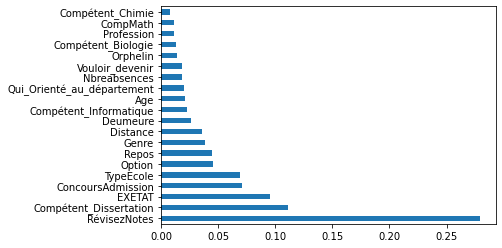

In [ ]:
feat_importances = pd.Series(RFR.feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
mae_RF= metrics.mean_absolute_error(y_test,y_predict_RF)
r2_score_RF=metrics.r2_score(y_test,y_predict_RF)
mse_RF= metrics.mean_squared_error(y_test, y_predict_RF)
rmse_RF= np.sqrt(metrics.mean_squared_error(y_test, y_predict_RF))
accuracy_RF=RFR.score(X_test,y_test)

4. Regression Lineaire

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict_lreg=lreg.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_LR= metrics.mean_absolute_error(y_test,y_predict_lreg)
r2_score_LR=metrics.r2_score(y_test,y_predict_lreg)
mse_LR= metrics.mean_squared_error(y_test, y_predict_lreg)
rmse_LR= np.sqrt(metrics.mean_squared_error(y_test, y_predict_lreg))
accuracy_LR=lreg.score(X_test,y_test)

5. Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
#On verifie les features les plus importants pour notre modele
etr.feature_importances_

In [ ]:
feat_importances = pd.Series(etr.feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [ ]:
y_predict_etr=etr.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_ETR= metrics.mean_absolute_error(y_test,y_predict_etr)
r2_score_ETR=metrics.r2_score(y_test,y_predict_etr)
mse_ETR= metrics.mean_squared_error(y_test, y_predict_etr)
rmse_ETR= np.sqrt(metrics.mean_squared_error(y_test, y_predict_etr))
accuracy_ETR=etr.score(X_test,y_test)

6. Arbre de Decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()

In [ ]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,
                          scoring='neg_mean_squared_error',cv=20,verbose=20)

In [ ]:
# fonction permettant de calculer le temps nécessaire au réglage 
#des hyperparamètres

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod(
            (datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [ ]:
%%capture
from datetime import datetime
start_time=timer(None)
tuning_model.fit(X_train,y_train)
timer(start_time)

In [ ]:
tuning_model.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [ ]:
#Entrainement de Decision Tree avec les meilleurs Hyperparametres
tuned_hyper_model= DecisionTreeRegressor(max_depth=9,
                                         max_features='auto',
                                         max_leaf_nodes=80,
                                         min_samples_leaf=6,
                                         min_weight_fraction_leaf=0.1,
                                         splitter='random')

In [ ]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=80,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.1, presort='deprecated',
                      random_state=None, splitter='random')

In [ ]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [ ]:
from sklearn import metrics

mae_dt=metrics.mean_absolute_error(y_test,tuned_pred)
r2_dt=metrics.r2_score(y_test,tuned_pred)
mse_dt=metrics.mean_squared_error(y_test, tuned_pred)
rmse_dt=np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))
accuracy_dt=tuned_hyper_model.score(X_test,y_test)

6. KNN Regressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

model_knn = GridSearchCV(knn, params, cv=5)

In [ ]:
model_knn.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model_knn.best_params_

{'n_neighbors': 2}

In [ ]:
knn_model=KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
knn_pred=knn_model.predict(x_test)

In [ ]:
from sklearn import metrics
mae_knn=metrics.mean_absolute_error(y_test,knn_pred)
r2_knn=metrics.r2_score(y_test,tuned_pred)
mse_knn=metrics.mean_squared_error(y_test, knn_pred)
rmse_knn=np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
accuracy_knn=knn_model.score(x_test,y_test)

**3.5. EVALUATION**

In [ ]:
models=['Random Forest Regressor avec GridSearchCV',
        'Support Vector Regressor avec GridSearchCV',
        'Ridge avec GridSearchCV',
        'Random Forest Regressor sans GridSearchCV',
        'Regression Lineaire sans GridSearchCV',
        'Extra Trees Regressor sans GridSearchCV',
        'Arbre de decision avec GridSearchCV',
       'KNN Regressor avec GridSearchCV']
mae=[round(mae_rfrtuned,2),round(mae_svr,2),round(mae_ridge,2),
     round(mae_RF,2),round(mae_LR,2),round(mae_ETR,2),round(mae_dt,2),
    round(mae_knn,2)]
r2=[round(r2_score_rfrtuned,2),round(r2_score_svr,2),
    round(r2_score_ridge,2),round(r2_score_RF,2),round(r2_score_LR,2),
    round(r2_score_ETR,2),round(r2_dt,2),round(r2_knn,2)]
mse=[round(mse_rfrtuned,2),round(mse_svr,2),round(mse_ridge,2),
     round(mse_RF,2),round(mse_LR,2),round(mse_ETR,2),round(mse_dt,2),
    round(mse_knn,2)]
rmse=[round(rmse_rfrtuned,2),round(rmse_svr,2),round(rmse_ridge,2),
      round(rmse_RF,2),round(rmse_LR,2),round(rmse_ETR,2),round(rmse_dt,2),
     round(rmse_knn,2)]
accuracy=[round(accuracy_rfrtuned,2),round(accuracy_svr,2),
          round(accuracy_ridge,2),round(accuracy_RF,2),round(accuracy_LR,2),
          round(accuracy_ETR,2),round(accuracy_dt,2),round(accuracy_knn,2)]
import pandas as pd
sommaire_evaluation=pd.DataFrame({'Models':models,
                                  'MAE':mae,
                                  'R2 Score':r2,
                                  'MSE': mse,
                                  'RMSE':rmse,
                                  'Accuracy': accuracy
                                   
})
sommaire_evaluation

,Models,MAE,R2 Score,MSE,RMSE,Accuracy
0,Random Forest Regressor avec GridSearchCV,0.89,0.88,3.57,1.89,0.88
1,Support Vector Regressor avec GridSearchCV,2.75,0.48,16.09,4.01,-0.00
2,Ridge avec GridSearchCV,3.14,0.44,17.40,4.17,0.44
3,Random Forest Regressor sans GridSearchCV,0.44,0.93,2.23,1.49,0.93
4,Regression Lineaire sans GridSearchCV,2.57,0.62,11.81,3.44,0.62
5,Extra Trees Regressor sans GridSearchCV,0.45,0.90,2.97,1.72,0.90
6,Arbre de decision avec GridSearchCV,3.25,0.44,17.46,4.18,0.44
7,KNN Regressor avec GridSearchCV,0.51,0.44,3.08,1.76,0.90


Nous constatons que Random Forest Regressor sans GridSearchCV a donne un r2_score de 0.93, ce qui est proche de 1 
et son Mean Absolute Error est plus petit que pour les autres modeles avec 2.21.
 Et, son accuracy et de 0.93%. Ainsi, nous optons pour ce modele

 Exportation du modele

In [ ]:
import joblib
#On sauvegarde notre modele dans le chemin ci-apres:
joblib.dump(RFR,
            r'ModelG1.ml')

['ModelG1.ml']

**G2**

In [ ]:
 #On supprime partout ou il y a des vides dans mes variables  
dfG2=dfG2.dropna(axis=0, how='any') 

In [ ]:
dfG2

In [ ]:
 dfG2['PourcentageG2']=dfG2['PourcentageG2'].abs()

**4. Creation du modele en G2**

4.1. Recuperation des features et du Target

In [ ]:
X1 = dfG2.drop(columns=['PourcentageG2']) 
y1 = dfG2['PourcentageG2']

In [ ]:
print(X1.shape)
print(y1.shape)

(724, 27)
(724,)


2. Division du dataset en training et test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(
    X1,y1,test_size=0.25,random_state=123)

4.3. Utilisation de Random Forest Regressor comme algorithme

4.3.1. Nous appliquons le GridSearchCV pour optimiser le modele

In [ ]:
# La grille des Hyperparametres de Random Forest Regressor sont comme suit:
##1. n_estimators = nombre d'arbres dans la foret 
##2. max_features = nombre max des features considerés pour
     #pour diviser les noeuds
##3. max_depth = nombre max des niveaux dans chaque arbre de decision 
##4. min_samples_split = nombre min des points des données placés 
     #dans un noeud avant qu'on le divise
##5. min_samples_leaf = nombre min des points des données permis dans une 
     #feille de noeud
##6. bootstrap = méthode d'échantillonnage de points de données
     #(avec ou sans remplacement)
##7. etc.
from sklearn.model_selection import GridSearchCV
# Création de la grille de paramètres basée sur les résultats de la
#recherche aléatoire. 
grille_des_parametres = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

4.3.2. Instatiation du modele Random Forest

In [ ]:
# Creation du modele
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
# Instantiate the grid search model
grid_search=GridSearchCV(estimator = random_forest, 
                         param_grid = grille_des_parametres, 
                         cv = 3, n_jobs = -1, verbose = 2)
#N.B: n_jobs dans le GridSearchCV specifie le nombre de travaux (jobs) 
#à exécuter en parallèle.
#None signifie 1 sauf dans un contexte joblib.parallel_backend.
#Tandisque n_jobs=-1 signifie utiliser tous les processeurs
#Verbose est un entier qui contrôle la verbosité : 
##plus elle est élevée, plus il y a de messages.
#>1 : le temps de calcul pour chaque pli et paramètre candidat est affiché;
#>2 : le score est également affiché ;
#>3 : les index des plis et des paramètres candidats sont également 
#affichés ainsi que l'heure de début du calcul.

4.3.3. Entrainement du modele pour trouver les meilleurs parametres

In [ ]:
 grid_search.fit(X1_train, y1_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.0min


In [ ]:
#On affiche les meilleurs parametres qui peuvent optimiser notre modele
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

4.3.4. Construction de notre modele avec des parametres obtenus

4.3.4.1. Entrainement du modele

In [ ]:
#On met les parametres tel que affichés en haut
model=RandomForestRegressor(bootstrap=True,max_depth=80,max_features=3,
                            min_samples_leaf=3,min_samples_split=8,
                            n_estimators=100)
#On entraine le modele
model.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

4.3.4.2. Utilisation du modele pour l'evaluer après

In [ ]:
y1_predict=model.predict(X1_test)

4.3.4.3. Evaluation du modele en utilisant r2, MSE, RMSE et MAE

In [ ]:
from sklearn import metrics
import numpy as np
mae_rfrtuned= metrics.mean_absolute_error(y1_test,y1_predict)
r2_score_rfrtuned=metrics.r2_score(y1_test,y1_predict)
mse_rfrtuned= metrics.mean_squared_error(y1_test, y1_predict)
rmse_rfrtuned= np.sqrt(metrics.mean_squared_error(y1_test, y1_predict))
accuracy_rfrtuned=model.score(X1_test,y1_test)

1.1. Support Vector Regressor avec GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf',gamma=1,C=1)

In [ ]:
from sklearn import preprocessing
X1_train_scale=preprocessing.scale(X1_train)
X1_test_scale=preprocessing.scale(X1_test)
svr_model.fit(X1_train_scale, y1_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y1_predict_SVR=svr_model.predict(X1_test_scale)

In [ ]:
from sklearn import metrics
import numpy as np
mae_svr= metrics.mean_absolute_error(y1_test,y1_predict_SVR)
r2_score_svr=metrics.r2_score(y1_test,y1_predict_SVR)
mse_svr= metrics.mean_squared_error(y1_test, y1_predict_SVR)
rmse_svr= np.sqrt(metrics.mean_squared_error(y1_test, y1_predict_SVR))
accuracy_svr=svr_model.score(X1_test,y1_test)

1.2. Ridge avec GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid,
                    scoring='r2', verbose=1, n_jobs=-1)
#ridge = Ridge()
grid_result = grid.fit(X1_train, y1_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.5213226593616576
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s finished


In [ ]:
ridge=Ridge(alpha=1000)
ridge.fit(X1_train,y1_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y1_predict_Ridge=ridge.predict(X1_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_ridge= metrics.mean_absolute_error(y1_test,y1_predict_Ridge)
r2_score_ridge=metrics.r2_score(y1_test,y1_predict_Ridge)
mse_ridge= metrics.mean_squared_error(y1_test, y1_predict_Ridge)
rmse_ridge= np.sqrt(metrics.mean_squared_error(y1_test, y1_predict_Ridge))
accuracy_ridge=ridge.score(X1_test,y1_test)

1.3. Random Forest Regressor sans GridSerachCV

In [ ]:
RFR=RandomForestRegressor()
RFR.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y1_predict_RF=RFR.predict(X1_test)

In [ ]:
#On verifie les features les plus importants pour notre modele 
RFR.feature_importances_

array([0.01650819, 0.04981591, 0.06152623, 0.00304985, 0.00393615,
       0.02387777, 0.00301694, 0.00223878, 0.04372344, 0.0102281 ,
       0.02030115, 0.01222715, 0.03674219, 0.00340228, 0.00997979,
       0.01201781, 0.00322871, 0.04791034, 0.03270437, 0.06354413,
       0.00065435, 0.02290936, 0.03592007, 0.11037688, 0.01843941,
       0.194603  , 0.15711766])

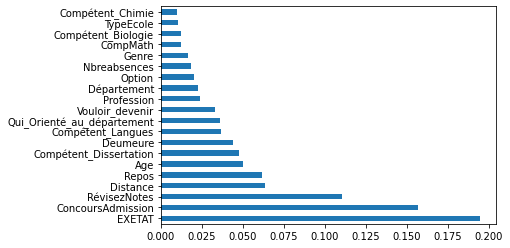

In [ ]:
feat_importances = pd.Series(RFR.feature_importances_, 
                             index=X1_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
mae_RF= metrics.mean_absolute_error(y1_test,y1_predict_RF)
r2_score_RF=metrics.r2_score(y1_test,y1_predict_RF)
mse_RF= metrics.mean_squared_error(y1_test, y1_predict_RF)
rmse_RF= np.sqrt(metrics.mean_squared_error(y1_test, y1_predict_RF))
accuracy_RF=RFR.score(X1_test,y1_test)

1.4. Regression Lineaire

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1_predict_lreg=lreg.predict(X1_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_LR= metrics.mean_absolute_error(y1_test,y1_predict_lreg)
r2_score_LR=metrics.r2_score(y1_test,y1_predict_lreg)
mse_LR= metrics.mean_squared_error(y1_test, y1_predict_lreg)
rmse_LR= np.sqrt(metrics.mean_squared_error(y1_test, y1_predict_lreg))
accuracy_LR=lreg.score(X1_test,y1_test)

1.5. Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()
etr.fit(X1_train,y1_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
#On verifie les features les plus importants pour notre modele
etr.feature_importances_

array([0.04582779, 0.05139961, 0.08572037, 0.00663265, 0.00951366,
       0.01151452, 0.00978236, 0.00842257, 0.01645181, 0.02368463,
       0.04105554, 0.02272108, 0.02791724, 0.01454981, 0.04983749,
       0.01362453, 0.00817657, 0.08108379, 0.02429782, 0.06687634,
       0.00085416, 0.01398877, 0.06186261, 0.14368185, 0.0154724 ,
       0.08712568, 0.05792433])

In [ ]:
feat_importances = pd.Series(etr.feature_importances_, 
                             index=X1_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [ ]:
y1_predict_etr=etr.predict(X1_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_ETR= metrics.mean_absolute_error(y1_test,y1_predict_etr)
r2_score_ETR=metrics.r2_score(y1_test,y1_predict_etr)
mse_ETR= metrics.mean_squared_error(y1_test, y1_predict_etr)
rmse_ETR= np.sqrt(metrics.mean_squared_error(y1_test, y1_predict_etr))
accuracy_ETR=etr.score(X1_test,y1_test)

1.6. Arbre de Decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialisation de la gamme des hyper paramètres pour le réglage(tuning)
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()

In [ ]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,
                          scoring='neg_mean_squared_error',cv=20,verbose=20)

In [ ]:
# fonction permettant de calculer le temps nécessaire au réglage 
#des hyperparamètres

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod(
            (datetime.now()-start_time).total_seconds(),360)
        tmin,tsec=divmod(temp_sec,10)
        print(thour,":",tmin,':',round(tsec,2))

In [ ]:
%%capture
from datetime import datetime
start_time=timer(None)
tuning_model.fit(X1_train,y1_train)
timer(start_time)

In [ ]:
tuning_model.best_params_

AttributeError: ignored

In [ ]:
#Entrainement de Decision Tree avec les meilleurs Hyperparametres
tuned_hyper_model= DecisionTreeRegressor(max_depth=9,
                                         max_features='auto',
                                         max_leaf_nodes=30,
                                         min_samples_leaf=9,
                                         min_weight_fraction_leaf=0.1,
                                         splitter='random')

In [ ]:
tuned_hyper_model.fit(X1_train,y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.1, presort='deprecated',
                      random_state=None, splitter='random')

In [ ]:
tuned_pred=tuned_hyper_model.predict(X1_test)

In [ ]:
from sklearn import metrics

mae_dt=metrics.mean_absolute_error(y1_test,tuned_pred)
r2_dt=metrics.r2_score(y1_test,tuned_pred)
mse_dt=metrics.mean_squared_error(y1_test, tuned_pred)
rmse_dt=np.sqrt(metrics.mean_squared_error(y1_test, tuned_pred))
accuracy_dt=tuned_hyper_model.score(X1_test,y1_test)

1.6. KNN Regressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x1_train = scaler.fit_transform(X1_train)
x1_test = scaler.fit_transform(X1_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)

In [ ]:
model_knn.fit(x1_train,y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model_knn.best_params_

{'n_neighbors': 2}

In [ ]:
knn_model=KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn_model.fit(x1_train,y1_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
knn_pred=knn_model.predict(x1_test)

In [ ]:
from sklearn import metrics
mae_knn=metrics.mean_absolute_error(y1_test,knn_pred)
r2_knn=metrics.r2_score(y1_test,tuned_pred)
mse_knn=metrics.mean_squared_error(y1_test, knn_pred)
rmse_knn=np.sqrt(metrics.mean_squared_error(y1_test, knn_pred))
accuracy_knn=knn_model.score(x1_test,y1_test)

**4.3.5. EVALUATION**

In [ ]:
models=['Random Forest Regressor avec GridSearchCV',
        'Support Vector Regressor avec GridSearchCV',
        'Ridge avec GridSearchCV',
        'Random Forest Regressor sans GridSearchCV',
        'Regression Lineaire sans GridSearchCV',
        'Extra Trees Regressor sans GridSearchCV',
        'Arbre de decision avec GridSearchCV',
       'KNN Regressor avec GridSearchCV']
mae=[round(mae_rfrtuned,2),round(mae_svr,2),round(mae_ridge,2),
     round(mae_RF,2),round(mae_LR,2),round(mae_ETR,2),round(mae_dt,2),
    round(mae_knn,2)]
r2=[round(r2_score_rfrtuned,2),round(r2_score_svr,2),
    round(r2_score_ridge,2),round(r2_score_RF,2),round(r2_score_LR,2),
    round(r2_score_ETR,2),round(r2_dt,2),round(r2_knn,2)]
mse=[round(mse_rfrtuned,2),round(mse_svr,2),round(mse_ridge,2),
     round(mse_RF,2),round(mse_LR,2),round(mse_ETR,2),round(mse_dt,2),
    round(mse_knn,2)]
rmse=[round(rmse_rfrtuned,2),round(rmse_svr,2),round(rmse_ridge,2),
      round(rmse_RF,2),round(rmse_LR,2),round(rmse_ETR,2),round(rmse_dt,2),
     round(rmse_knn,2)]
accuracy=[round(accuracy_rfrtuned,2),round(accuracy_svr,2),
          round(accuracy_ridge,2),round(accuracy_RF,2),round(accuracy_LR,2),
          round(accuracy_ETR,2),round(accuracy_dt,2),round(accuracy_knn,2)]
import pandas as pd
sommaire_evaluation=pd.DataFrame({'Models':models,
                                  'MAE':mae,
                                  'R2 Score':r2,
                                  'MSE': mse,
                                  'RMSE':rmse,
                                  'Accuracy': accuracy
                                   
})
sommaire_evaluation

,Models,MAE,R2 Score,MSE,RMSE,Accuracy
0,Random Forest Regressor avec GridSearchCV,0.97,0.94,3.39,1.84,0.94
1,Support Vector Regressor avec GridSearchCV,2.77,0.37,33.37,5.78,-0.00
2,Ridge avec GridSearchCV,3.66,0.35,34.60,5.88,0.35
3,Random Forest Regressor sans GridSearchCV,0.30,0.99,0.40,0.63,0.99
4,Regression Lineaire sans GridSearchCV,3.24,0.61,20.58,4.54,0.61
5,Extra Trees Regressor sans GridSearchCV,0.14,1.00,0.15,0.39,1.00
6,Arbre de decision avec GridSearchCV,4.03,0.31,36.52,6.04,0.31
7,KNN Regressor avec GridSearchCV,0.36,0.31,1.60,1.26,0.97


Extra Trees Regressor sans GridSearchCV a donne un r2_score de 1
et son Mean Absolute Error est plus petit que pour les autres modeles avec 0.15.
 Et, son accuracy est de 1. Ainsi, nous optons pour ce modele

In [ ]:
import joblib
#On sauvegarde notre modele dans le chemin ci-apres:
joblib.dump(etr,
            r'ModelG2.ml')

['ModelG2.ml']

**G3**

In [ ]:
 #On supprime partout ou il y a des vides dans mes variables  
dfG3=dfG3.dropna(axis=0, how='any') 

In [ ]:
dfG3

In [ ]:
 dfG3['PourcentageG3']=dfG3['PourcentageG3'].abs()

**4. Creation du modele**

4.1. Recuperation des features et du Target

In [ ]:
X2 = dfG3.drop(columns=['PourcentageG3']) 
y2 = dfG3['PourcentageG3']

In [ ]:
print(X2.shape)
print(y2.shape)

(566, 27)
(566,)


4.2. Division du dataset en training et test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(
    X2,y2,test_size=0.25,random_state=123)

4.3. Utilisation de Random Forest Regressor comme algorithme

4.3.1. Nous appliquons le GridSearchCV pour optimiser le modele

In [ ]:
# La grille des Hyperparametres de Random Forest Regressor sont comme suit:
##1. n_estimators = nombre d'arbres dans la foret 
##2. max_features = nombre max des features considerés pour
     #pour diviser les noeuds
##3. max_depth = nombre max des niveaux dans chaque arbre de decision 
##4. min_samples_split = nombre min des points des données placés 
     #dans un noeud avant qu'on le divise
##5. min_samples_leaf = nombre min des points des données permis dans une 
     #feille de noeud
##6. bootstrap = méthode d'échantillonnage de points de données
     #(avec ou sans remplacement)
##7. etc.
from sklearn.model_selection import GridSearchCV
# Création de la grille de paramètres basée sur les résultats de la
#recherche aléatoire. 
grille_des_parametres = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

4.3.2. Instatiation du modele Random Forest

In [ ]:
# Creation du modele
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
# Instantiate the grid search model
grid_search=GridSearchCV(estimator = random_forest, 
                         param_grid = grille_des_parametres, 
                         cv = 3, n_jobs = -1, verbose = 2)
#N.B: n_jobs dans le GridSearchCV specifie le nombre de travaux (jobs) 
#à exécuter en parallèle.
#None signifie 1 sauf dans un contexte joblib.parallel_backend.
#Tandisque n_jobs=-1 signifie utiliser tous les processeurs
#Verbose est un entier qui contrôle la verbosité : 
##plus elle est élevée, plus il y a de messages.
#>1 : le temps de calcul pour chaque pli et paramètre candidat est affiché;
#>2 : le score est également affiché ;
#>3 : les index des plis et des paramètres candidats sont également 
#affichés ainsi que l'heure de début du calcul.

4.3.3. Entrainement du modele pour trouver les meilleurs parametres

In [ ]:
 grid_search.fit(X2_train, y2_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [207]:
#On affiche les meilleurs parametres qui peuvent optimiser notre modele
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

4.3.4. Construction de notre modele avec des parametres obtenus

4.3.4.1. Entrainement du modele

In [208]:
#On met les parametres tel que affichés en haut
model=RandomForestRegressor(bootstrap=True,max_depth=80,max_features=3,
                            min_samples_leaf=3,min_samples_split=8,
                            n_estimators=200)
#On entraine le modele
model.fit(X2_train,y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

4.3.4.2. Utilisation du modele pour l'evaluer apres

In [209]:
y2_predict=model.predict(X2_test)

4.3.4.3. Evaluation du modele en utilisant r2, MSE, RMSE et MAE

In [210]:
from sklearn import metrics
import numpy as np
mae_rfrtuned= metrics.mean_absolute_error(y2_test,y2_predict)
r2_score_rfrtuned=metrics.r2_score(y2_test,y2_predict)
mse_rfrtuned= metrics.mean_squared_error(y2_test, y2_predict)
rmse_rfrtuned= np.sqrt(metrics.mean_squared_error(y2_test, y2_predict))
accuracy_rfrtuned=model.score(X2_test,y2_test)

2.1. Support Vector Regressor avec GridSearchCV

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf',gamma=1,C=1)

In [212]:
from sklearn import preprocessing
X2_train_scale=preprocessing.scale(X2_train)
X2_test_scale=preprocessing.scale(X2_test)
svr_model.fit(X2_train_scale, y2_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [213]:
y2_predict_SVR=svr_model.predict(X2_test_scale)

In [214]:
from sklearn import metrics
import numpy as np
mae_svr= metrics.mean_absolute_error(y2_test,y2_predict_SVR)
r2_score_svr=metrics.r2_score(y2_test,y2_predict_SVR)
mse_svr= metrics.mean_squared_error(y2_test, y2_predict_SVR)
rmse_svr= np.sqrt(metrics.mean_squared_error(y2_test, y2_predict_SVR))
accuracy_svr=svr_model.score(X2_test,y2_test)

2.2. Ridge avec GridSearchCV

In [215]:
from sklearn.linear_model import Ridge
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid,
                    scoring='r2', verbose=1, n_jobs=-1)
#ridge = Ridge()
grid_result = grid.fit(X2_train, y2_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6797474408434605
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


In [216]:
ridge=Ridge(alpha=1000)
ridge.fit(X2_train,y2_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [217]:
y2_predict_Ridge=ridge.predict(X2_test)

In [218]:
from sklearn import metrics
import numpy as np
mae_ridge= metrics.mean_absolute_error(y2_test,y2_predict_Ridge)
r2_score_ridge=metrics.r2_score(y2_test,y2_predict_Ridge)
mse_ridge= metrics.mean_squared_error(y2_test, y2_predict_Ridge)
rmse_ridge= np.sqrt(metrics.mean_squared_error(y2_test, y2_predict_Ridge))
accuracy_ridge=ridge.score(X2_test,y2_test)

2.3. Random Forest Regressor sans GridSerachCV

In [219]:
RFR=RandomForestRegressor()
RFR.fit(X2_train,y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [220]:
y2_predict_RF=RFR.predict(X2_test)

In [221]:
#On verifie les features les plus importants pour notre modele
RFR.feature_importances_

array([0.01017927, 0.05793145, 0.01586998, 0.00127195, 0.06892668,
       0.02567757, 0.00450731, 0.00170001, 0.04137632, 0.03234868,
       0.07662346, 0.01897063, 0.00462987, 0.00169149, 0.04163418,
       0.05364428, 0.0184567 , 0.00145905, 0.01552693, 0.01754031,
       0.01753308, 0.03129011, 0.06326985, 0.11745928, 0.1405507 ,
       0.0859609 , 0.03396997])

In [ ]:
feat_importances = pd.Series(RFR.feature_importances_, 
                             index=X2_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [222]:
from sklearn import metrics
import numpy as np
mae_RF= metrics.mean_absolute_error(y2_test,y2_predict_RF)
r2_score_RF=metrics.r2_score(y2_test,y2_predict_RF)
mse_RF= metrics.mean_squared_error(y2_test, y2_predict_RF)
rmse_RF= np.sqrt(metrics.mean_squared_error(y2_test, y2_predict_RF))
accuracy_RF=RFR.score(X2_test,y2_test)

2.4. Regression Lineaire

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X2_train, y2_train)

In [ ]:
y2_predict_lreg=lreg.predict(X2_test)

In [ ]:
from sklearn import metrics
import numpy as np
mae_LR= metrics.mean_absolute_error(y2_test,y2_predict_lreg)
r2_score_LR=metrics.r2_score(y2_test,y2_predict_lreg)
mse_LR= metrics.mean_squared_error(y2_test, y2_predict_lreg)
rmse_LR= np.sqrt(metrics.mean_squared_error(y2_test, y2_predict_lreg))
accuracy_LR=lreg.score(X2_test,y2_test)

2.5. Extra Tree Regressor

In [223]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()
etr.fit(X2_train,y2_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [224]:
#On verifie les features les plus importants pour notre modele
etr.feature_importances_

array([0.01913176, 0.01640243, 0.02164592, 0.00244894, 0.06914352,
       0.02931819, 0.0089172 , 0.00291384, 0.0267727 , 0.03629975,
       0.05949207, 0.01980377, 0.00541709, 0.00715877, 0.03524843,
       0.06478541, 0.01252439, 0.00621297, 0.01529393, 0.03056383,
       0.01529464, 0.06059071, 0.04827835, 0.18245243, 0.13410304,
       0.04628975, 0.02349618])

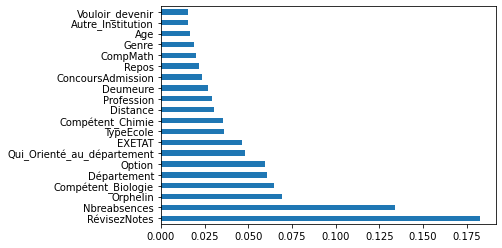

In [225]:
feat_importances = pd.Series(etr.feature_importances_, 
                             index=X2_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [226]:
y2_predict_etr=etr.predict(X2_test)

In [227]:
from sklearn import metrics
import numpy as np
mae_ETR= metrics.mean_absolute_error(y2_test,y2_predict_etr)
r2_score_ETR=metrics.r2_score(y2_test,y2_predict_etr)
mse_ETR= metrics.mean_squared_error(y2_test, y2_predict_etr)
rmse_ETR= np.sqrt(metrics.mean_squared_error(y2_test, y2_predict_etr))
accuracy_ETR=etr.score(X2_test,y2_test)

2.6. Arbre de Decision

In [228]:
from sklearn.tree import DecisionTreeRegressor

In [229]:
# Initialisation de la gamme des hyper paramètres pour le réglage(tuning)

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

from sklearn.model_selection import GridSearchCV

In [230]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()

In [231]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,
                          scoring='neg_mean_squared_error',cv=20,verbose=20)

In [232]:
tuning_model.best_params_

AttributeError: ignored

In [233]:
#Entrainement de Decision Tree avec les meilleurs Hyperparametres
tuned_hyper_model= DecisionTreeRegressor(max_depth=9,
                                         max_features='auto',
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.1,
                                         splitter='best')

In [234]:
tuned_hyper_model.fit(X2_train,y2_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.1, presort='deprecated',
                      random_state=None, splitter='best')

In [235]:
tuned_pred=tuned_hyper_model.predict(X2_test)

In [236]:
from sklearn import metrics

mae_dt=metrics.mean_absolute_error(y2_test,tuned_pred)
r2_dt=metrics.r2_score(y2_test,tuned_pred)
mse_dt=metrics.mean_squared_error(y2_test, tuned_pred)
rmse_dt=np.sqrt(metrics.mean_squared_error(y2_test, tuned_pred))
accuracy_dt=tuned_hyper_model.score(X2_test,y2_test)

2.6. KNN Regressor

In [237]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x2_train = scaler.fit_transform(X2_train)
x2_test = scaler.fit_transform(X2_test)

In [238]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)

In [239]:
model_knn.fit(x2_train,y2_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [240]:
model_knn.best_params_

{'n_neighbors': 2}

In [241]:
knn_model=KNeighborsRegressor(n_neighbors=2)

In [242]:
knn_model.fit(x2_train,y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [243]:
knn_pred=knn_model.predict(x2_test)

In [244]:
from sklearn import metrics
mae_knn=metrics.mean_absolute_error(y2_test,knn_pred)
r2_knn=metrics.r2_score(y2_test,tuned_pred)
mse_knn=metrics.mean_squared_error(y2_test, knn_pred)
rmse_knn=np.sqrt(metrics.mean_squared_error(y2_test, knn_pred))
accuracy_knn=knn_model.score(x2_test,y2_test)

In [245]:
models=['Random Forest Regressor avec GridSearchCV',
        'Support Vector Regressor avec GridSearchCV',
        'Ridge avec GridSearchCV',
        'Random Forest Regressor sans GridSearchCV',
        'Regression Lineaire sans GridSearchCV',
        'Extra Trees Regressor sans GridSearchCV',
        'Arbre de decision avec GridSearchCV',
       'KNN Regressor avec GridSearchCV']
mae=[round(mae_rfrtuned,2),round(mae_svr,2),round(mae_ridge,2),
     round(mae_RF,2),round(mae_LR,2),round(mae_ETR,2),round(mae_dt,2),
    round(mae_knn,2)]
r2=[round(r2_score_rfrtuned,2),round(r2_score_svr,2),
    round(r2_score_ridge,2),round(r2_score_RF,2),round(r2_score_LR,2),
    round(r2_score_ETR,2),round(r2_dt,2),round(r2_knn,2)]
mse=[round(mse_rfrtuned,2),round(mse_svr,2),round(mse_ridge,2),
     round(mse_RF,2),round(mse_LR,2),round(mse_ETR,2),round(mse_dt,2),
    round(mse_knn,2)]
rmse=[round(rmse_rfrtuned,2),round(rmse_svr,2),round(rmse_ridge,2),
      round(rmse_RF,2),round(rmse_LR,2),round(rmse_ETR,2),round(rmse_dt,2),
     round(rmse_knn,2)]
accuracy=[round(accuracy_rfrtuned,2),round(accuracy_svr,2),
          round(accuracy_ridge,2),round(accuracy_RF,2),round(accuracy_LR,2),
          round(accuracy_ETR,2),round(accuracy_dt,2),round(accuracy_knn,2)]
import pandas as pd
sommaire_evaluation=pd.DataFrame({'Models':models,
                                  'MAE':mae,
                                  'R2 Score':r2,
                                  'MSE': mse,
                                  'RMSE':rmse,
                                  'Accuracy': accuracy
                                   
})
sommaire_evaluation

,Models,MAE,R2 Score,MSE,RMSE,Accuracy
0,Random Forest Regressor avec GridSearchCV,1.03,0.89,6.01,2.45,0.89
1,Support Vector Regressor avec GridSearchCV,2.65,0.55,24.14,4.91,-0.00
2,Ridge avec GridSearchCV,4.14,0.40,31.99,5.66,0.40
3,Random Forest Regressor sans GridSearchCV,0.29,0.98,0.86,0.92,0.98
4,Regression Lineaire sans GridSearchCV,3.24,0.61,20.58,4.54,0.61
5,Extra Trees Regressor sans GridSearchCV,0.04,1.00,0.05,0.23,1.00
6,Arbre de decision avec GridSearchCV,2.89,0.60,21.48,4.63,0.60
7,KNN Regressor avec GridSearchCV,0.21,0.60,1.23,1.11,0.98


In [246]:
import joblib
#On sauvegarde notre modele dans le chemin ci-apres:
joblib.dump(etr,
            r'ModelG3.ml')

['ModelG3.ml']